In [1]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np

from src.DE_simulation import fickian_diffusion, Diffusion_eqn, simple_pulling_diffusion, simple_adhesion_diffusion, Heterogeneous_Diffusion_eqn
from src.ABM_package import cell_interaction_ABM_multistates, migration_reaction_step_adhesion_pulling

from scipy.integrate import odeint


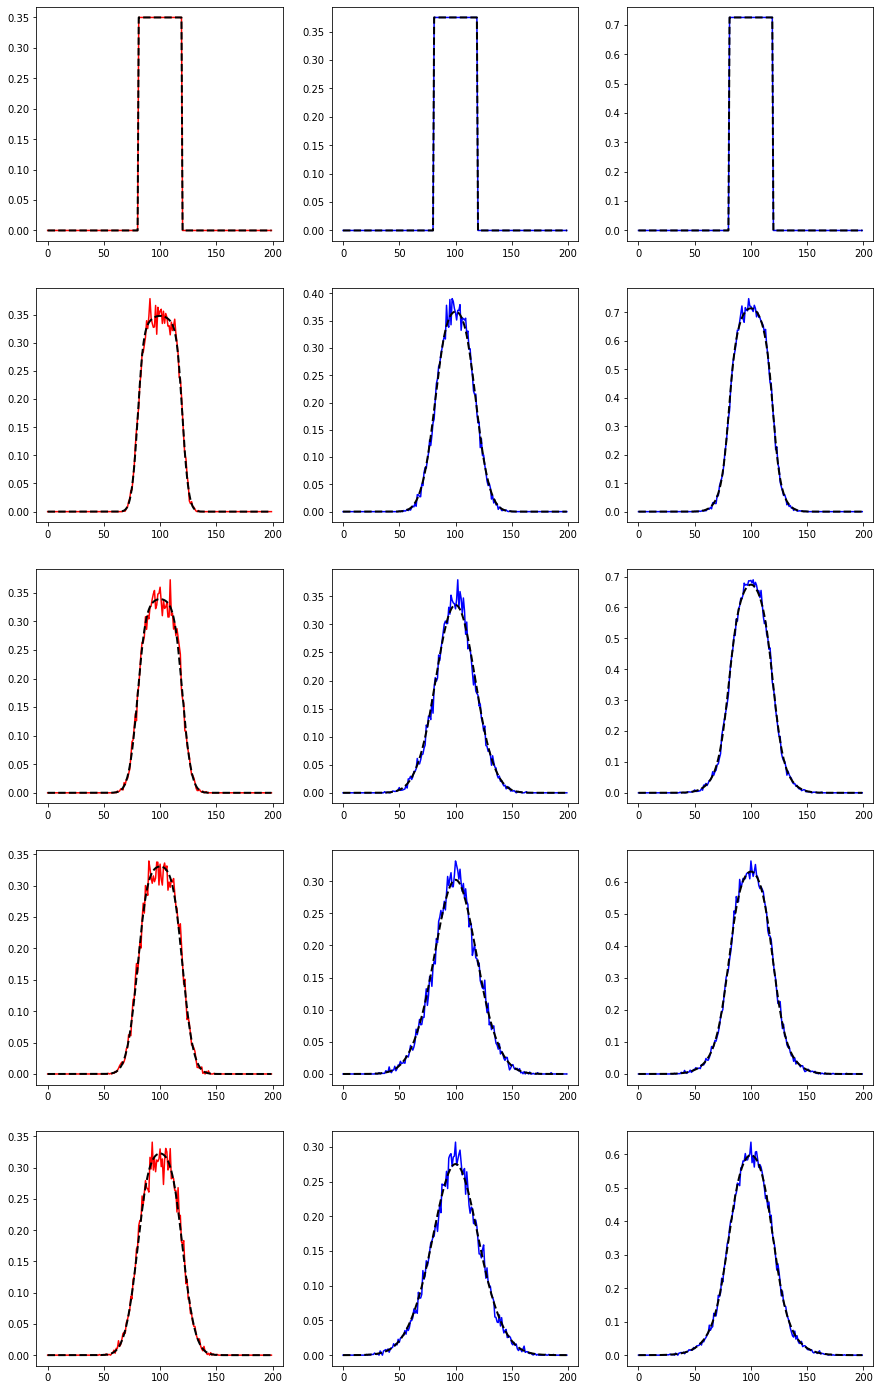

In [8]:
from src.get_params import get_heterog_LHC_params_vary_Padh_Ppull_alpha
params_all = get_heterog_LHC_params_vary_Padh_Ppull_alpha("Training")

params = params_all[-8]

PmH, PmP, Pp, Padh, Ppull, alpha = params

filename = f"../../data/adhesion_pulling_mean_25_PmH_{PmH}_PmP_{PmP}_Pp_{Pp}_Padh_{Padh}_Ppull_{Ppull}_alpha_{alpha}.npy"
mat = np.load(filename,allow_pickle=True).item()

U = mat['compartments']
H, P = U[0,:,:], U[1,:,:]

t = mat['t'][0,:]#t_out
x = mat['x']#x_out
n = len(x)

## Mean-field model
q = [PmH/4, PmP/4, Padh, Ppull]
IC = np.hstack( (H[:,0], P[:,0]) )
sol = odeint(Heterogeneous_Diffusion_eqn, IC, t, args=(x, q))
sol = sol.T        

sol_H, sol_P = sol[:n,:], sol[n:,:]

fig, axs = plt.subplots(5,3,figsize = (15,5*5))

for i in np.arange(5):
    axs[i,0].plot(x,H[:,20*i],"r-")
    axs[i,0].plot(x,sol_H[:,20*i],"k--",linewidth=2)
    axs[i,1].plot(x,P[:,20*i],"b-")
    axs[i,1].plot(x,sol_P[:,20*i],"k--",linewidth=2)
    axs[i,2].plot(x,P[:,20*i] + H[:,20*i],"b-")
    axs[i,2].plot(x,sol_P[:,20*i]+sol_H[:,20*i],"k--",linewidth=2)

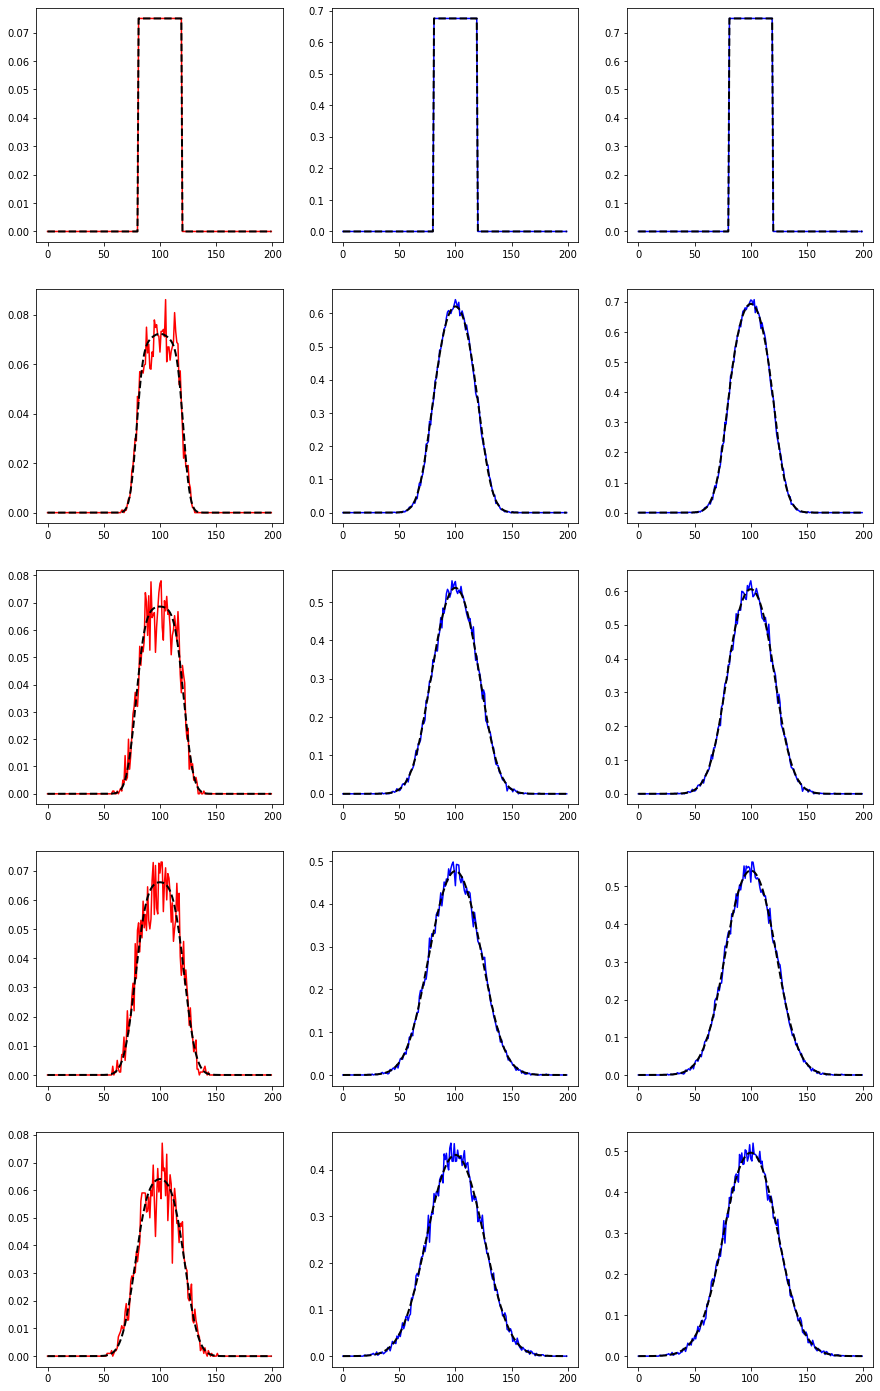

In [3]:
PmH = 0.25
PmP = 1.0
Padh = 0.33
Ppull = 0.33
alpha = 0.1

C_out, compartments_out ,t_out, x_out, plot_list = cell_interaction_ABM_multistates((PmH, PmP, Padh, Ppull, alpha),
                                         migration_rules = migration_reaction_step_adhesion_pulling,
                                         T_end=500.0)

filename = f"../../data/adhesion_pulling_mean_25_PmH_{PmH}_PmP_{PmP}_Padh_{Padh}_Ppull_{Ppull}_alpha_{alpha}.npy"
mat = np.load(filename,allow_pickle=True).item()

U = mat['compartments']
H, P = U[0,:,:], U[1,:,:]

t = mat['t'][0,:]#t_out
x = mat['x']#x_out
n = len(x)

## Mean-field model
q = [PmH/4, PmP/4, Padh, Ppull]
IC = np.hstack( (H[:,0], P[:,0]) )
sol = odeint(Heterogeneous_Diffusion_eqn, IC, t, args=(x, q))
sol = sol.T        

sol_H, sol_P = sol[:n,:], sol[n:,:]

fig, axs = plt.subplots(5,3,figsize = (15,5*5))

for i in np.arange(5):
    axs[i,0].plot(x,H[:,20*i],"r-")
    axs[i,0].plot(x,sol_H[:,20*i],"k--",linewidth=2)
    axs[i,1].plot(x,P[:,20*i],"b-")
    axs[i,1].plot(x,sol_P[:,20*i],"k--",linewidth=2)
    axs[i,2].plot(x,P[:,20*i] + H[:,20*i],"b-")
    axs[i,2].plot(x,sol_P[:,20*i]+sol_H[:,20*i],"k--",linewidth=2)
    